In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [347]:
df=pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [348]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.00,0.00,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.00,0.00,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.00,0.00,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.00,0.00,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.00,0.00,0.00,0.00


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [350]:
df=df.drop(labels=['Ad - Length','Ad- Width','Ad Size','Timestamp','InventoryType','Ad Type','Platform','Matched_Queries','Fee','Format'],axis=1)
df

,Device Type,Available_Impressions,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC
0,Desktop,1806,323,1,0.00,0.00,0.00,0.00,0.00
1,Mobile,1780,285,1,0.00,0.00,0.00,0.00,0.00
2,Desktop,2727,355,1,0.00,0.00,0.00,0.00,0.00
3,Mobile,2430,495,1,0.00,0.00,0.00,0.00,0.00
4,Desktop,1218,242,1,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
23061,Mobile,1,1,1,0.07,0.05,NaN,NaN,NaN
23062,Desktop,3,2,1,0.04,0.03,NaN,NaN,NaN
23063,Mobile,2,1,1,0.05,0.03,NaN,NaN,NaN
23064,Mobile,7,1,1,0.07,0.05,NaN,NaN,NaN


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Device Type            23066 non-null  object 
 1   Available_Impressions  23066 non-null  int64  
 2   Impressions            23066 non-null  int64  
 3   Clicks                 23066 non-null  int64  
 4   Spend                  23066 non-null  float64
 5   Revenue                23066 non-null  float64
 6   CTR                    18330 non-null  float64
 7   CPM                    18330 non-null  float64
 8   CPC                    18330 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.6+ MB


In [352]:
df.isnull().sum()

Device Type                 0
Available_Impressions       0
Impressions                 0
Clicks                      0
Spend                       0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [353]:
df.shape

(23066, 9)

In [354]:
df.duplicated().sum()

15

#### Checking the Summary Statistic

In [355]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Available_Impressions,23066.00,2432043.67,4742887.76,1.00,33672.25,483771.00,2527711.75,27592861.00
Impressions,23066.00,1241519.52,2429399.96,1.00,7990.50,225290.00,1112428.50,14194774.00
Clicks,23066.00,10678.52,17353.41,1.00,710.00,4425.00,12793.75,143049.00
Spend,23066.00,2706.63,4067.93,0.00,85.18,1425.12,3121.40,26931.87
Revenue,23066.00,1924.25,3105.24,0.00,55.37,926.34,2091.34,21276.18
CTR,18330.00,0.07,0.08,0.00,0.00,0.08,0.13,1.00
CPM,18330.00,7.67,6.48,0.00,1.71,7.66,12.51,81.56
CPC,18330.00,0.35,0.34,0.00,0.09,0.16,0.57,7.26


Insights:
1.The showing right skew distribution for Available_Impressions,Matched_Queries,Impressions,Clicks,Clicks,Revenue,CPM.\
2.On the basis of above description the most of data would have the outliers present.\
3.Data is unscaled.\
4.Data has 23066 rows and 19 columns\
5.It indicates values either heavily tailed or highly skewed

#### 1.2 Treating missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing

In [356]:
def calculate_CTR(x):
    Clicks=df.Clicks
    Impressions=df.Impressions
    CTR = (Clicks/(Impressions))
    return CTR
#The actual formula should be  CTR = (Clicks/(Impressions)*100)
#but due to % count in data sheet we will bound to leave the multiplication of 100

In [357]:
def calculate_CPM(x):
    Spend=df.Spend
    Impressions=df.Impressions
    CPM = (Spend/(Impressions)*1000)
    return CPM

In [358]:
def calculate_CPC(x):
    Spend=df.Spend
    Clicks=df.Clicks
    CPC = (Spend/(Clicks))
    return CPC

In [359]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_CTR(x))
df['CPM']= df[['CPM']].apply(lambda x: calculate_CPM(x))
df['CPC']= df[['CPC']].apply(lambda x: calculate_CPC(x))

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Device Type            23066 non-null  object 
 1   Available_Impressions  23066 non-null  int64  
 2   Impressions            23066 non-null  int64  
 3   Clicks                 23066 non-null  int64  
 4   Spend                  23066 non-null  float64
 5   Revenue                23066 non-null  float64
 6   CTR                    23066 non-null  float64
 7   CPM                    23066 non-null  float64
 8   CPC                    23066 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.6+ MB


In [361]:
df.tail()

,Device Type,Available_Impressions,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC
23061,Mobile,1,1,1,0.07,0.05,1.00,70.00,0.07
23062,Desktop,3,2,1,0.04,0.03,0.50,20.00,0.04
23063,Mobile,2,1,1,0.05,0.03,1.00,50.00,0.05
23064,Mobile,7,1,1,0.07,0.05,1.00,70.00,0.07
23065,Mobile,2,2,1,0.09,0.06,0.50,45.00,0.09


#### 1.3 Checking for Outliers in dataset by Tukey Method

In [362]:
dfnum=df.select_dtypes(["int64","float64"])
len(dfnum.columns)

8

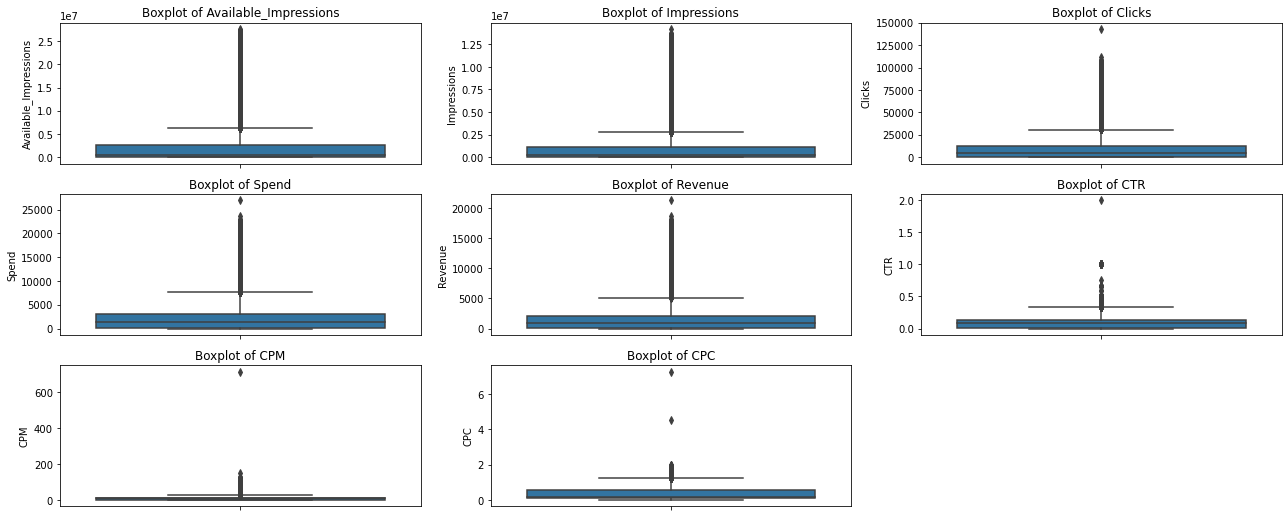

In [363]:
plt.figure(figsize = (18,12))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Insight: There is presence of large number of extreme data are in almost all variables except ad length and ad-width.

#### Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

#### Outlier treatment required
1.Since K-Means algorithm is about finding mean of clusters, the algorithm is sensitive to outliers.The centroids will not be a true representation of a cluster in the presence of outliers.\ 2.The sum of squared errors (SSE) will also be very high in the case of outliers. Small clusters will bond with outliers, which may not be the true representation of the natural patterns of clusters in data.
3.Hence it is better to identify and remove outliers before applying K-means clustering algorithm.
The Tukey’s method defines an outlier as those values of the data set that fall far from the central point, the median

The IQR method is best suited for datasets which are skewed (either left or right) because we required to keep a check on the extreme values, by checking lower and upper limit.

In [364]:
#Defining a function which returns the Upper and Lower limit to detect outliers for each feature
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
       #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q75 if y > upper_bound else y).apply(lambda y: q25 if y < lower_bound else y)

In [365]:
outlier_list = [x for x in dfnum.columns]

In [366]:
for i in dfnum[outlier_list]:    
    dfnum[i]=treat_outlier(dfnum[i])

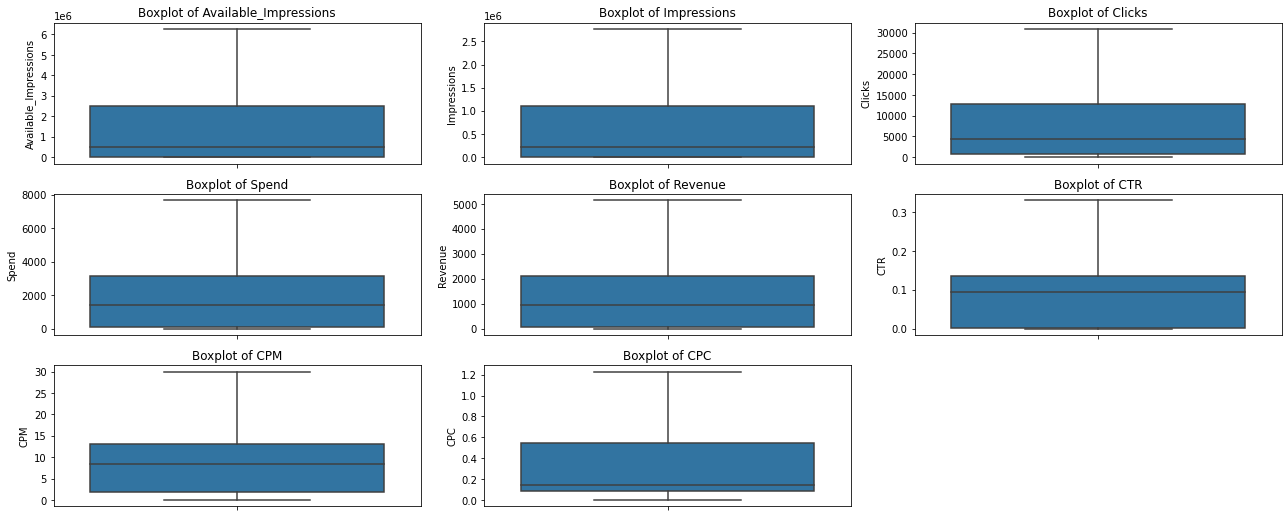

In [367]:
plt.figure(figsize = (18,12))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### 1.4 Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm

In [368]:
from scipy.stats import zscore
pd.options.display.float_format = '{:.3f}'.format
dfnum_scaled=dfnum.apply(zscore)
dfnum_scaled.head()

,Available_Impressions,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC
0,-0.819,-0.879,-0.950,-1.004,-1.008,-0.984,-1.226,-1.102
1,-0.819,-0.879,-0.950,-1.004,-1.008,-0.978,-1.226,-1.102
2,-0.819,-0.879,-0.950,-1.004,-1.008,-0.987,-1.226,-1.102
3,-0.819,-0.878,-0.950,-1.004,-1.008,-0.998,-1.226,-1.102
4,-0.820,-0.879,-0.950,-1.004,-1.008,-0.970,-1.226,-1.102


In [369]:
dfnum_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Available_Impressions,23066.000,0.000,1.000,-0.821,-0.798,-0.496,0.877,3.390
Impressions,23066.000,0.000,1.000,-0.879,-0.866,-0.497,1.006,3.809
Clicks,23066.000,-0.000,1.000,-0.950,-0.854,-0.348,0.792,3.259
Spend,23066.000,0.000,1.000,-1.004,-0.955,-0.189,0.781,3.385
Revenue,23066.000,-0.000,1.000,-1.008,-0.959,-0.190,0.839,3.535
CTR,23066.000,-0.000,1.000,-1.022,-0.989,0.180,0.703,3.216
CPM,23066.000,-0.000,1.000,-1.226,-0.960,0.046,0.756,3.331
CPC,23066.000,-0.000,1.000,-1.102,-0.786,-0.611,0.823,3.231


#### Benifit of choosing Z score:
1.The benefit of performing the Z score normalization is that the clear outlier in the dataset has been transformed in such a way that it’s no longer a massive outlier.\
2.The Z-score of an observation is defined as the number of standard deviations it falls above or below the mean, in other words it computes the variance (i.e. distance). Clustering data modeling technique needs normalization, in the sense that it requires to compute the Euclidean distance. The Z-score is suited well and is essential to compare similarities between attributes based on certain distance measure. The same applies to Principal Components Regression (PCR); in it we are interested in the components that maximize the variance.
3.This speeds up the algorithm to a great extent as many elements are skipped. If this technique is not used, the algorithm would perform computations for all the elements, and thus get reduced to a quadratic [O(n^2n2)] algorithm, equivalent to naive pattern searching.    \
4.Better computation. Computationally, it can speed up the calculation due to rounding errors. Computers, like humans, work better with numbers that are on a similar scale. I think modern software does this on its own, but not always.
5.Interpretation. It can improve interpretation, particularly when you are comparing across variables with very different scales and means. You can even sometimes compare variables in different experiments.

In [370]:
dfnum_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Available_Impressions  23066 non-null  float64
 1   Impressions            23066 non-null  float64
 2   Clicks                 23066 non-null  float64
 3   Spend                  23066 non-null  float64
 4   Revenue                23066 non-null  float64
 5   CTR                    23066 non-null  float64
 6   CPM                    23066 non-null  float64
 7   CPC                    23066 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


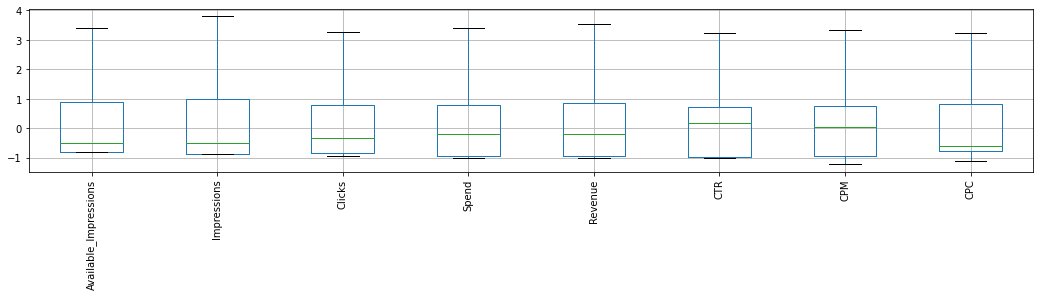

In [371]:
dfnum_scaled.boxplot(figsize=(18,3))
plt.xticks(rotation=90)
plt.show()

#### 1.5 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [372]:
import scipy.cluster.hierarchy as shc

In [463]:
wardlink=linkage(dfnum_scaled,method='ward',metric='euclidean')

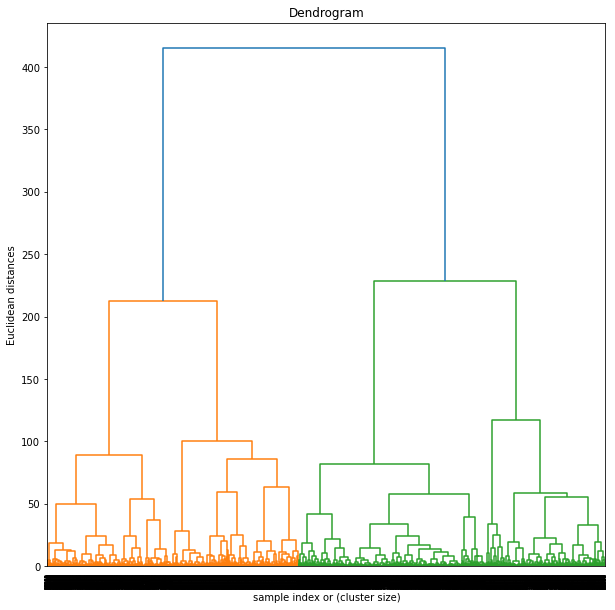

In [465]:
plt.figure(figsize=(10, 10))
dand=dendrogram(wardlink)
plt.title('Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('Euclidean distances')
plt.show()

In [399]:
k_means = KMeans(n_clusters = 2,random_state=42)

In [400]:
k_means.fit(dfnum_scaled)

KMeans(n_clusters=2, random_state=42)

In [401]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [402]:
k_means = KMeans(n_clusters = 1)
k_means.fit(dfnum_scaled)
k_means.inertia_

184528.0000000003

In [403]:
wss=[]

In [406]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(dfnum_scaled)
    wss.append(KM.inertia_)  

In [407]:
wss

[184528.0000000003,
 96470.2073112208,
 69289.05949170691,
 48522.558129064404,
 41640.79126469919,
 36521.95814058762,
 31367.195138734925,
 27406.77378043877,
 24315.29472637937,
 22368.054758388134,
 184528.0000000003,
 96470.5645847809,
 69288.97397747991,
 48522.55825283969,
 41664.45016839325,
 36752.61508590262,
 31367.194592449854,
 27386.331464776988,
 24335.836550185726,
 22316.62098917462]

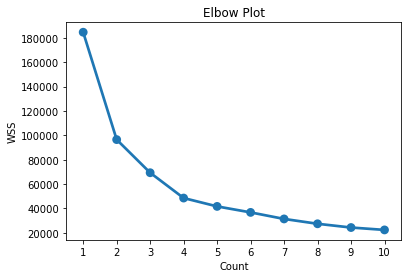

In [381]:
import seaborn as sns
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss);
plt.title('Elbow Plot')
plt.xlabel('Count')
plt.ylabel('WSS')
plt.show()

Insights:.......

In [415]:
k_means = KMeans(n_clusters = 4,random_state=42)
k_means.fit(dfnum_scaled)
labels = k_means.labels_

In [416]:
df["Clus_kmeans"] = labels
df.head()

,Device Type,Available_Impressions,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width,freq
0,Desktop,1806,323,1,0.000,0.000,0.003,0.000,0.000,1,0.054,1
1,Mobile,1780,285,1,0.000,0.000,0.004,0.000,0.000,1,0.053,1
2,Desktop,2727,355,1,0.000,0.000,0.003,0.000,0.000,1,0.055,1
3,Mobile,2430,495,1,0.000,0.000,0.002,0.000,0.000,1,0.057,1
4,Desktop,1218,242,1,0.000,0.000,0.004,0.000,0.000,1,0.051,1


Insights:....

In [384]:
df["Clus_kmeans"] = labels
df.head()

,Device Type,Available_Impressions,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,Clus_kmeans
0,Desktop,1806,323,1,0.000,0.000,0.003,0.000,0.000,1
1,Mobile,1780,285,1,0.000,0.000,0.004,0.000,0.000,1
2,Desktop,2727,355,1,0.000,0.000,0.003,0.000,0.000,1
3,Mobile,2430,495,1,0.000,0.000,0.002,0.000,0.000,1
4,Desktop,1218,242,1,0.000,0.000,0.004,0.000,0.000,1


In [385]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [409]:
silhouette_score(dfnum_scaled,labels)

0.44746494470272125

In [418]:
for i in range(1,11):
    print('The silhouette_score for',i,'clusters is',sil_width[i-1])

The silhouette_score for 1 clusters is 0.05373740761126703
The silhouette_score for 2 clusters is 0.05264193383194291
The silhouette_score for 3 clusters is 0.05454532245189112
The silhouette_score for 4 clusters is 0.056588986821948635
The silhouette_score for 5 clusters is 0.05091745040075091
The silhouette_score for 6 clusters is -0.03372506432855011
The silhouette_score for 7 clusters is 0.05301400790186797
The silhouette_score for 8 clusters is 0.04826677062965853
The silhouette_score for 9 clusters is 0.041923100696678636
The silhouette_score for 10 clusters is 0.053423255185931086


In [387]:
sil_width = silhouette_samples(dfnum_scaled,labels)

In [411]:
df["sil_width"] = sil_width
df.head(10)

,Device Type,Available_Impressions,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width,freq
0,Desktop,1806,323,1,0.000,0.000,0.003,0.000,0.000,1,0.054,1
1,Mobile,1780,285,1,0.000,0.000,0.004,0.000,0.000,1,0.053,1
2,Desktop,2727,355,1,0.000,0.000,0.003,0.000,0.000,1,0.055,1
3,Mobile,2430,495,1,0.000,0.000,0.002,0.000,0.000,1,0.057,1
4,Desktop,1218,242,1,0.000,0.000,0.004,0.000,0.000,1,0.051,1
5,Desktop,490,64,2,0.000,0.000,0.031,0.000,0.000,1,-0.034,1
6,Mobile,1197,202,1,0.010,0.000,0.005,0.050,0.010,1,0.053,1
7,Mobile,1363,196,1,0.000,0.000,0.005,0.000,0.000,1,0.048,1
8,Mobile,1402,136,1,0.000,0.000,0.007,0.000,0.000,1,0.042,1
9,Mobile,1816,311,1,0.000,0.000,0.003,0.000,0.000,1,0.053,1


In [412]:
silhouette_samples(dfnum_scaled,labels)

array([0.05373741, 0.05264193, 0.05454532, ..., 0.70518486, 0.70889603,
       0.71078083])

Insights: \
1.Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.
2.A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

#### 1.8 Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding

In [390]:
df.Clus_kmeans.value_counts().sort_index()

0    4957
1    5284
2    7753
3    5072
Name: Clus_kmeans, dtype: int64

In [460]:
clust_profile=df.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,sil_width,freq
Clus_kmeans,,,,,,,,,
0,257660.596,34099.551,3394.915,2355.213,0.132,12.895,0.098,0.363,4954
1,687033.845,3107.635,1252.075,813.861,0.004,1.789,0.498,0.458,5284
2,11159.530,1454.746,146.345,95.124,0.162,14.455,0.099,0.572,7756
3,4661592.760,9794.516,7464.828,5457.188,0.002,1.624,0.765,0.328,5072


In [462]:
df.groupby(['Clus_kmeans','Device Type']).mean()                      

Impressions    Clicks    Spend  Revenue   CTR    CPM  \
Clus_kmeans Device Type                                                         
0           Desktop       257299.410 34156.375 3383.062 2346.784 0.132 12.869   
            Mobile        257865.112 34067.375 3401.626 2359.985 0.131 12.910   
1           Desktop       678356.099  3110.616 1245.749  809.771 0.004  1.798   
            Mobile        691818.580  3105.992 1255.563  816.116 0.004  1.783   
2           Desktop        11137.342  1456.575  144.549   93.957 0.161 14.330   
            Mobile         11171.822  1453.733  147.340   95.771 0.162 14.524   
3           Desktop      4695834.586  9869.900 7475.291 5465.488 0.002  1.613   
            Mobile       4642330.414  9752.109 7458.942 5452.519 0.002  1.630   

                          CPC  sil_width  freq  
Clus_kmeans Device Type                         
0           Desktop     0.097      0.362 0.000  
            Mobile      0.098      0.363 0.000  
1           Desktop     0.494      0.458 1.000  
            Mobile      0.500      0.459 1.000  
2           Desktop     0.099      0.572 1.999  
            Mobile      0.099      0.572 1.999  
3           Desktop     0.760      0.330 3.000  
            Mobile      0.769      0.327 3.000

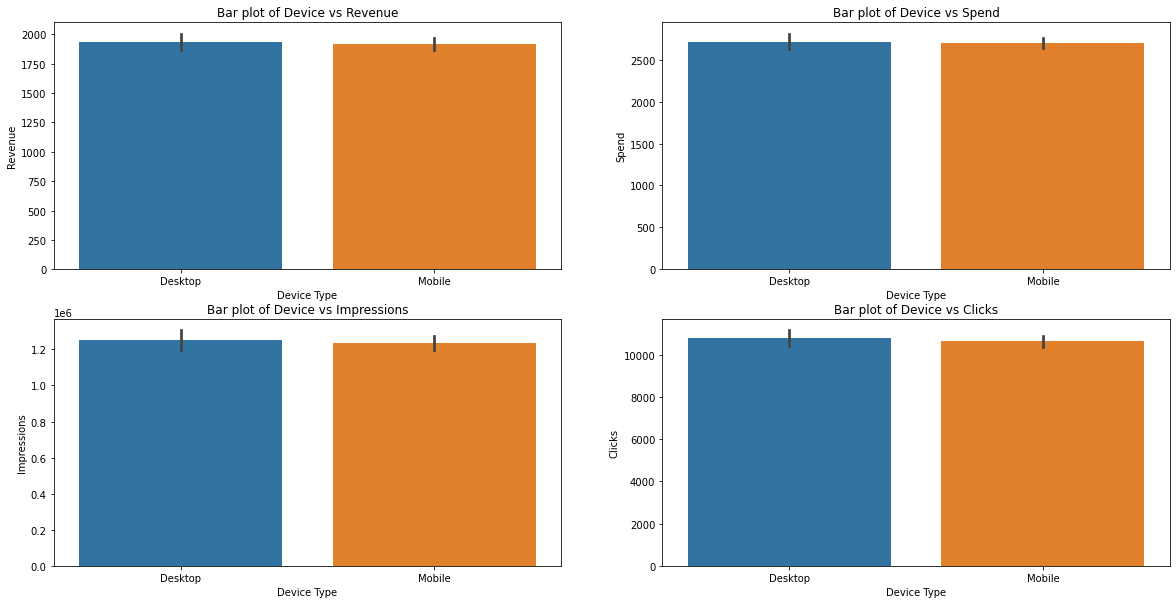

In [424]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='Device Type',y='Revenue',data=df)
plt.xlabel('Device Type')
plt.title('Bar plot of Device vs Revenue')
plt.subplot(2,2,2)
sns.barplot(x='Device Type',y='Spend',data=df)
plt.xlabel('Device Type')
plt.title('Bar plot of Device vs Spend')
plt.subplot(2,2,3)
sns.barplot(x='Device Type',y='Impressions',data=df)
plt.xlabel('Device Type');
plt.title('Bar plot of Device vs Impressions')
plt.subplot(2,2,4)
sns.barplot(x='Device Type',y='Clicks',data=df)
plt.xlabel('Device Type')
plt.title('Bar plot of Device vs Clicks');

Insights: \
1.Between the Desktop and Mobile the user has used the same by very minute difference in \ Impressions: 1214\
Clicks :133\
Spend :7\
Revenue:5\
is higher on Desktop.That means the desktop users are still have edge to some extent.\
2.Where as CTR =0, CPM, CPC having edge on Mobile.

In [461]:
df.sort_values(by='Device Type')

,Device Type,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width,freq
0,Desktop,323,1,0.000,0.000,0.003,0.000,0.000,1,0.054,1
18985,Desktop,998,318,27.510,17.882,0.319,27.565,0.087,2,0.339,2
15717,Desktop,4569995,10107,5357.510,3750.260,0.002,1.172,0.530,3,0.420,3
11428,Desktop,999499,5724,1985.200,1290.380,0.006,1.986,0.347,1,0.421,1
6337,Desktop,58577,8865,788.870,512.770,0.151,13.467,0.089,2,0.331,2
...,...,...,...,...,...,...,...,...,...,...,...
9327,Mobile,1097768,7766,1544.760,1004.090,0.007,1.407,0.199,1,0.338,1
9326,Mobile,609704,3230,1544.600,1003.990,0.005,2.533,0.478,1,0.625,1
9325,Mobile,83296,11403,1544.280,1003.780,0.137,18.540,0.135,0,0.073,0
9335,Mobile,850496,4528,1545.980,1004.890,0.005,1.818,0.341,1,0.594,1
